In [28]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
import tensorflow as tf

In [4]:
data = pd.read_csv(r'/content/creditcard.csv')

In [5]:
data.shape

(128821, 31)

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
data.isnull().sum()/len(data)*100

Time      0.000000
V1        0.000000
V2        0.000000
V3        0.000000
V4        0.000000
V5        0.000000
V6        0.000000
V7        0.000000
V8        0.000000
V9        0.000000
V10       0.000000
V11       0.000000
V12       0.000000
V13       0.000000
V14       0.000000
V15       0.000000
V16       0.000776
V17       0.000776
V18       0.000776
V19       0.000776
V20       0.000776
V21       0.000776
V22       0.000776
V23       0.000776
V24       0.000776
V25       0.000776
V26       0.000776
V27       0.000776
V28       0.000776
Amount    0.000776
Class     0.000776
dtype: float64

In [8]:
data.Class.value_counts()

0.0    128559
1.0       261
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


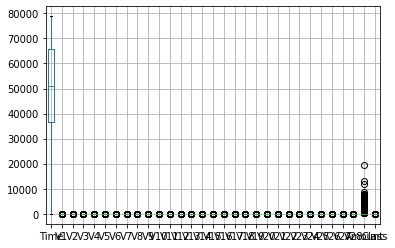

In [9]:
data.boxplot()

# Remove outliers

In [10]:
def remove_outliers(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return upper_range,lower_range

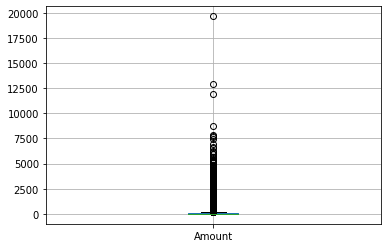

In [11]:
data.boxplot(column = ['Amount'])
plt.show()

In [12]:
upper_bound,lower_bound = remove_outliers(data['Amount'])
data['Amount'] = np.where(data['Amount']>=upper_bound,upper_bound,data['Amount'])
data['Amount'] = np.where(data['Amount']<=lower_bound,lower_bound,data['Amount'])

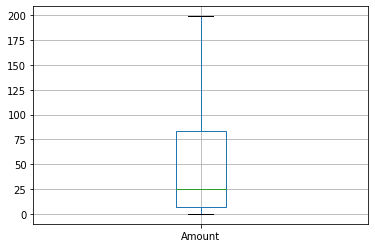

In [13]:
data.boxplot(column = ['Amount'])
plt.show()

# Train Test Split

In [14]:
X = data.drop('Class',axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state= 101)

In [15]:
X_train.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
y_train.dropna(inplace=True)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(103055, 30)
(103055,)
(25765, 30)
(25765,)


In [18]:
print(y_train.value_counts())
print(y_test.value_counts())

0.0    102851
1.0       204
Name: Class, dtype: int64
0.0    25708
1.0       57
Name: Class, dtype: int64


# Model Training

# Neural Network

In [29]:
model = Sequential()
model.add(Dense(30, input_dim=30, activation='relu'))     
model.add(Dense(1, activation='sigmoid'))                 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
3221/3221 [==============================] - 4s 1ms/step - loss: 2.6441 - accuracy: 0.9957
Epoch 2/10
3221/3221 [==============================] - 4s 1ms/step - loss: 1.9922 - accuracy: 0.9961
Epoch 3/10
3221/3221 [==============================] - 4s 1ms/step - loss: 1.9871 - accuracy: 0.9965
Epoch 4/10
3221/3221 [==============================] - 4s 1ms/step - loss: 2.3674 - accuracy: 0.9963
Epoch 5/10
3221/3221 [==============================] - 4s 1ms/step - loss: 1.8557 - accuracy: 0.9967
Epoch 6/10
3221/3221 [==============================] - 4s 1ms/step - loss: 1.6881 - accuracy: 0.9970
Epoch 7/10
3221/3221 [==============================] - 4s 1ms/step - loss: 1.7999 - accuracy: 0.9971
Epoch 8/10
3221/3221 [==============================] - 4s 1ms/step - loss: 1.9172 - accuracy: 0.9971
Epoch 9/10
3221/3221 [==============================] - 4s 1ms/step - loss: 1.2746 - accuracy: 0.9973
Epoch 10/10
3221/3221 [==============================] - 4s 1ms/step - loss: 1.692

In [34]:
print("Loss: ", model.evaluate(X_test, y_test, verbose=0))

Loss:  [7.612277984619141, 0.9977877140045166]
